**Table of Contents**: <br>
**A**. Importing Packages <br>
**B**. Loading Data <br>
**C**. Data Cleaning <br>
**D**. Descriptive Analytics <br>
**E**. Scatter Matrix Correlation <br>
**F**. Feature Engineering <br>
**G**. Linear Regression Model <br>
**H**. Final Linear Regression Model Test <br>
**I**. Recursive Feature Elimination <br>


**A. Importing Packages**

In [ ]:
#Importing packages

import warnings
warnings.filterwarnings('ignore')
!pip install -U scikit-learn
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.24.0)


**B. Loading Data**

In [ ]:
#Loading Data Set
bf = pd.read_csv('Black_Friday.csv')

**C. Data Cleaning**

In [ ]:
#Seeing which columns have NaN values
bf.isna().sum()
#Upon seeing this, we can confidently implement the dropna function as there are only two columns which have a significant amount of NaN values, product category 1 and 2

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            154750
Product_Category_3            345824
Purchase                           0
dtype: int64

In [ ]:
#Creating function that cleans the data
def clean(x, file_save_name):
  #Dropping columns with NaN values (Product category 1 and 2)
  x = x.dropna(axis = 1)
  #Turning all colmn values into strings
  x = x.astype(str)
  #Replacing "+4" into "4"
  x['Stay_In_Current_City_Years'] = x['Stay_In_Current_City_Years'].replace('4+', '4')
  #Replacing bin values for the middle value ronded down
  x['Age'] = x['Age'].replace('0-17', '9')
  x['Age'] = x['Age'].replace('55+', '55')
  x['Age'] = x['Age'].replace('26-35', '31')
  x['Age'] = x['Age'].replace('46-50', '48')
  x['Age'] = x['Age'].replace('51-55', '53')
  x['Age'] = x['Age'].replace('36-45', '41')
  x['Age'] = x['Age'].replace('18-25', '22')
  #Adding to Occupation, Marital Status, and Product Category Values so they can be differentiated once feature engineering is applied to them
  x['Occupation'] = x['Occupation'].replace('1', 'O1')
  x['Occupation'] = x['Occupation'].replace('2', 'O2')
  x['Occupation'] = x['Occupation'].replace('3', 'O3')
  x['Occupation'] = x['Occupation'].replace('4', 'O4')
  x['Occupation'] = x['Occupation'].replace('5', 'O5')
  x['Occupation'] = x['Occupation'].replace('6', 'O6')
  x['Occupation'] = x['Occupation'].replace('7', 'O7')
  x['Occupation'] = x['Occupation'].replace('8', 'O8')
  x['Occupation'] = x['Occupation'].replace('9', 'O9')
  x['Occupation'] = x['Occupation'].replace('10', 'O10')
  x['Occupation'] = x['Occupation'].replace('11', 'O11')
  x['Occupation'] = x['Occupation'].replace('12', 'O12')
  x['Occupation'] = x['Occupation'].replace('13', 'O13')
  x['Occupation'] = x['Occupation'].replace('14', 'O14')
  x['Occupation'] = x['Occupation'].replace('15', 'O15')
  x['Occupation'] = x['Occupation'].replace('16', 'O16')
  x['Occupation'] = x['Occupation'].replace('17', 'O17')
  x['Occupation'] = x['Occupation'].replace('18', 'O18')
  x['Occupation'] = x['Occupation'].replace('19', 'O19')
  x['Occupation'] = x['Occupation'].replace('20', 'O20')
  x['Occupation'] = x['Occupation'].replace('21', 'O21')
  x['Marital_Status'] = x['Marital_Status'].replace('0', 'M0')
  x['Marital_Status'] = x['Marital_Status'].replace('1', 'M1')
  x['Product_Category_1'] = x['Product_Category_1'].replace('1', 'P1')
  x['Product_Category_1'] = x['Product_Category_1'].replace('2', 'P2')
  x['Product_Category_1'] = x['Product_Category_1'].replace('3', 'P3')
  x['Product_Category_1'] = x['Product_Category_1'].replace('4', 'P4')
  x['Product_Category_1'] = x['Product_Category_1'].replace('5', 'P5')
  x['Product_Category_1'] = x['Product_Category_1'].replace('6', 'P6')
  x['Product_Category_1'] = x['Product_Category_1'].replace('7', 'P7')
  x['Product_Category_1'] = x['Product_Category_1'].replace('8', 'P8')
  x['Product_Category_1'] = x['Product_Category_1'].replace('9', 'P9')
  x['Product_Category_1'] = x['Product_Category_1'].replace('10', 'P10')
  x['Product_Category_1'] = x['Product_Category_1'].replace('11', 'P11')
  x['Product_Category_1'] = x['Product_Category_1'].replace('12', 'P12')
  x['Product_Category_1'] = x['Product_Category_1'].replace('13', 'P13')
  x['Product_Category_1'] = x['Product_Category_1'].replace('14', 'P14')
  x['Product_Category_1'] = x['Product_Category_1'].replace('15', 'P15')
  x['Product_Category_1'] = x['Product_Category_1'].replace('16', 'P16')
  x['Product_Category_1'] = x['Product_Category_1'].replace('17', 'P17')
  x['Product_Category_1'] = x['Product_Category_1'].replace('18', 'P18')
  #Turning Age, Stay, and Purchase values into integers
  numbers = {'Age':int, 'Stay_In_Current_City_Years':int, 'Purchase':int}
  x = x.astype(numbers)
  #Saving a cleaned file of this
  x.to_csv(file_save_name, index = False)

In [ ]:
#Cleaning and Saving the data set
clean(bf, "cleaned_bf_data.csv")

In [ ]:
#Setting template to load the values with the correct type
final_format = {'User_ID': str, 'Product_ID': str, 'Gender': str, 'Age': int, "Occupation": str, 'City_Category': str, 'Stay_In_Current_City_Years': int, 'Marital_Status': str, 'Product_Category_1': str, 'Purchase': int}
#Loading cleaned data
cbf = pd.read_csv(r'cleaned_bf_data.csv', dtype=final_format, delimiter=',')

**D. Descriptive Analysis**

*1*- Gender Frequency and Purchases by Gender

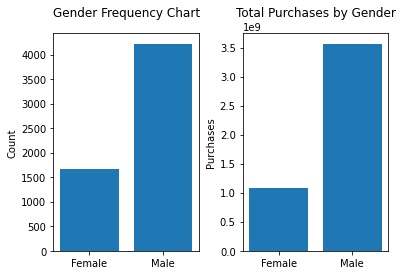

In [ ]:
#Grouping by gender and finding unique IDs to cont their frequency
Gender_by_ID = cbf.groupby('Gender')['User_ID'].nunique()
#Creating an x variable to graph
Gender = pd.Series(['Female', 'Male'])
#Grouping by gender and finding the sum of their purchases
Gender_by_Purchase = cbf.groupby('Gender')['Purchase'].sum()

#Creating 2 subplots
fig1, (ax1, ax2) = plt.subplots(1,2)

#Graphing gender frequency on the first plot
ax1.bar(Gender, Gender_by_ID)
ax1.set_title('Gender Frequency Chart', y=1.05)
ax1.set_ylabel('Count')

#Graphing gender total purchases
ax2.bar(Gender, Gender_by_Purchase)
ax2.set_title('Total Purchases by Gender', y=1.05)
ax2.set_ylabel('Purchases')

#Increasing the space between the graphs
fig1.subplots_adjust(wspace=0.3)

2- Total amount of purchases by cities.

Text(0.5, 1.0, 'Total Purchases by City')

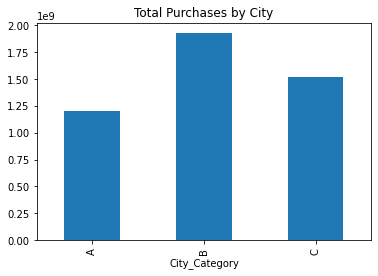

In [ ]:
#Grouping by city category and summing purchases, while plotting it into a bar graph
Purchase_by_City = cbf.groupby('City_Category')['Purchase'].sum().plot.bar()
#Adding a title to the graph
plt.title('Total Purchases by City')

3- Compare total amount of purchases for combinations of gender and age.

Text(0.5, 1.0, 'Age by Gender Total Purchases')

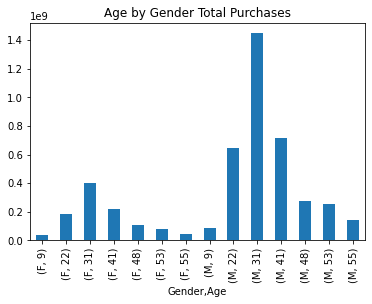

In [ ]:
#Grouping by gender and age, and summing their purchases, while plotting them into a bar graph
cbf.groupby(['Gender', 'Age'])['Purchase'].sum().plot.bar()
#Adding a title to the graph
plt.title('Age by Gender Total Purchases')

Clearly the best demographic to target are males in their 31sts. 

4- Using box and whisker plot, compare distribution of purchase amounts among combinations of genders and age.

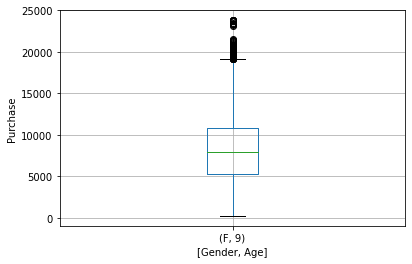

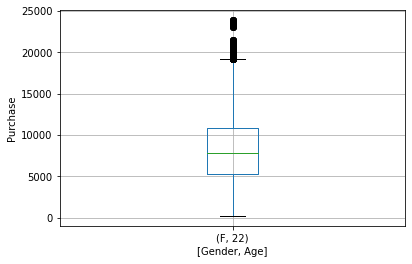

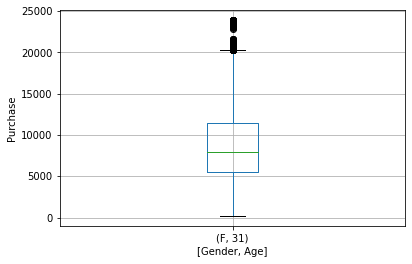

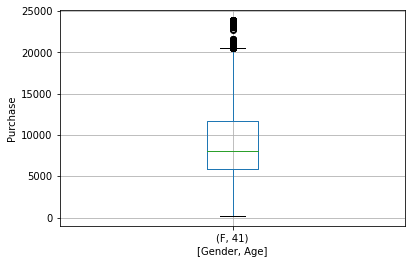

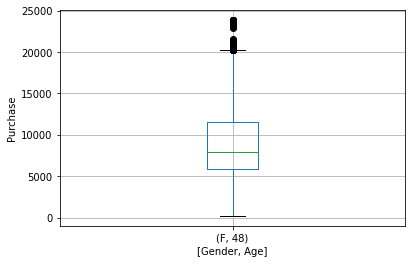

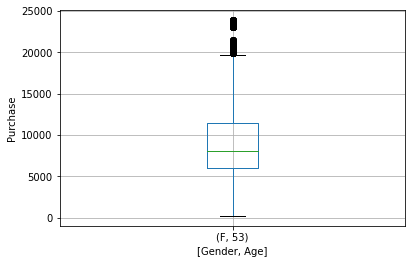

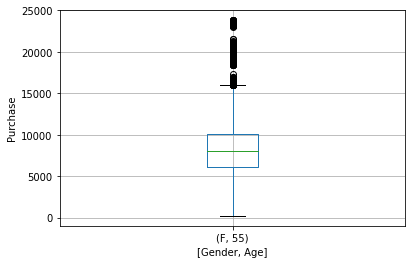

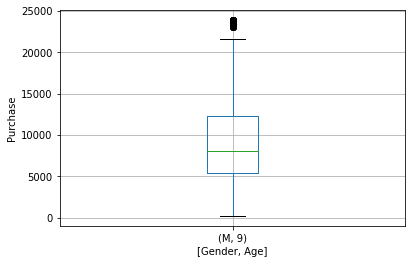

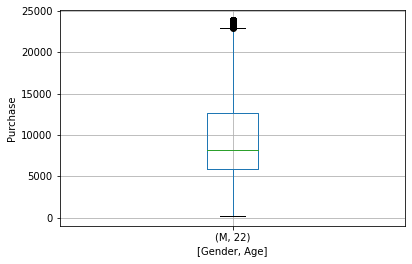

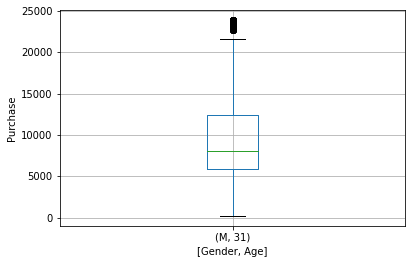

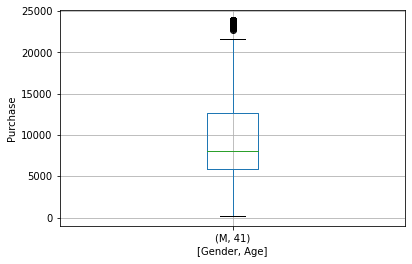

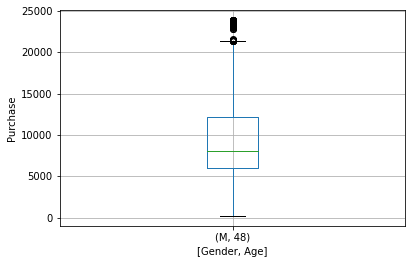

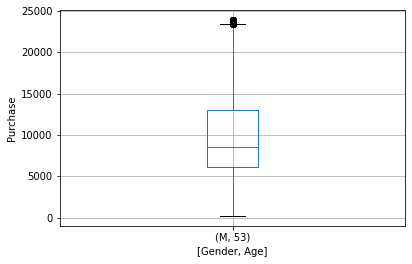

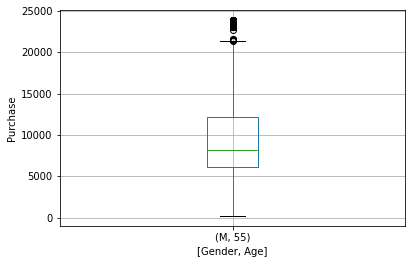

In [154]:
#Grouping by gender and age
Gender_by_Age = cbf.groupby(['Gender', 'Age'])

#For each subgroup, I made a box plot
for name, group in Gender_by_Age:
  x = group.boxplot(column='Purchase', by=['Gender', 'Age'])
  x.set_title('')
  x.set_ylabel('Purchase')
  plt.suptitle('')
  



5- Using box and whisker plot, compare distribution of purchase amounts among different occupations.

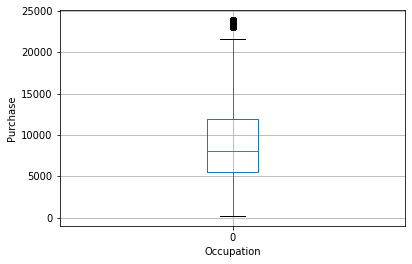

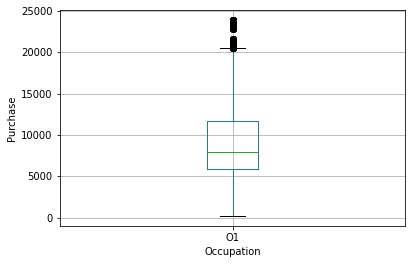

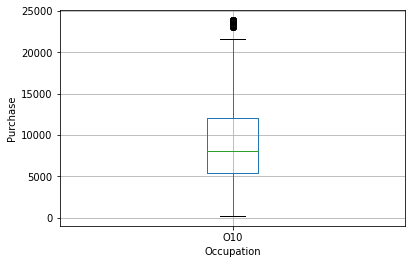

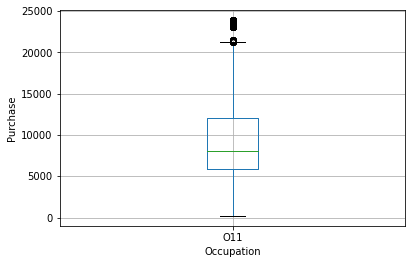

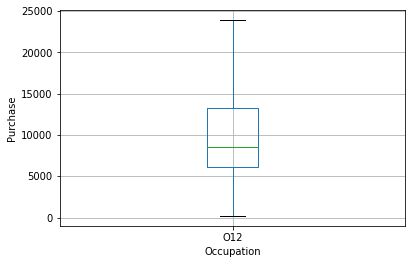

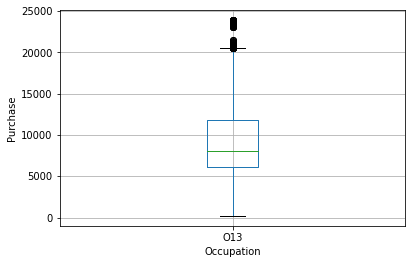

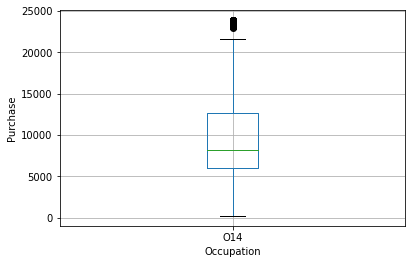

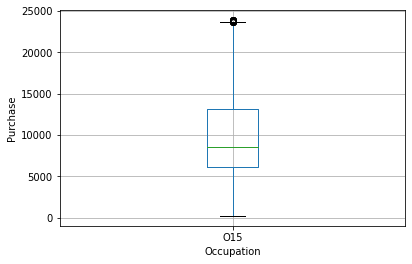

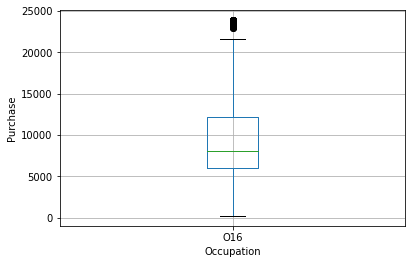

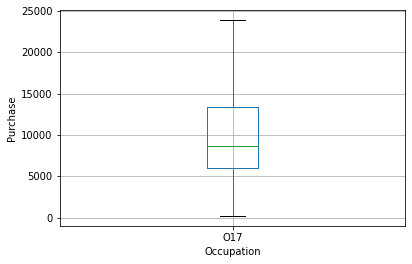

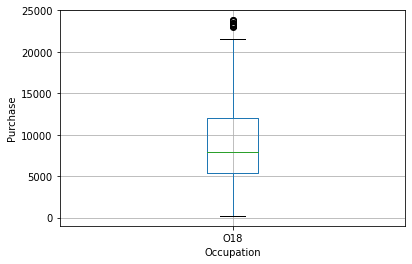

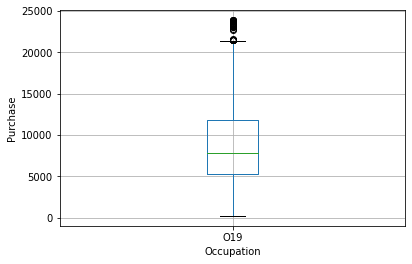

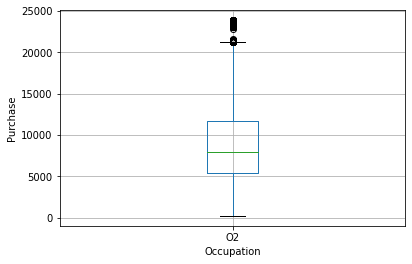

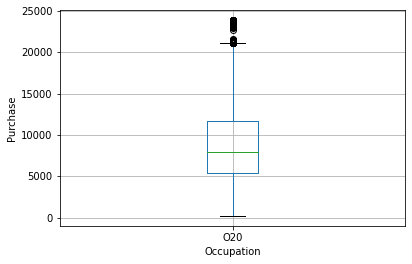

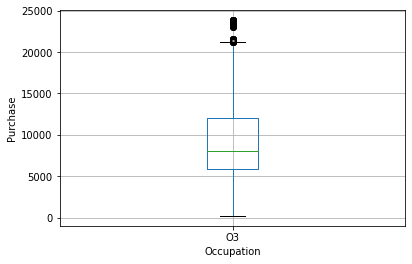

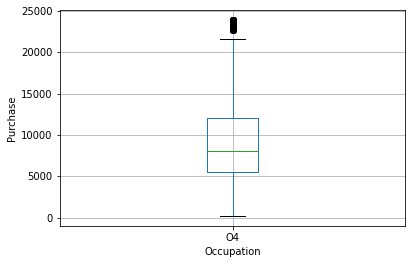

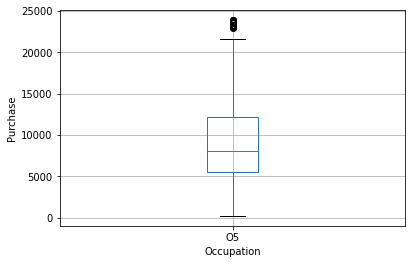

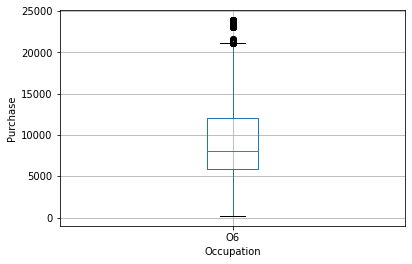

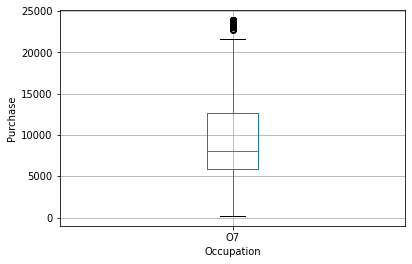

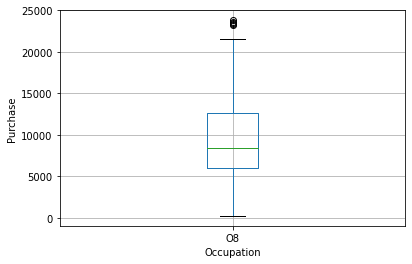

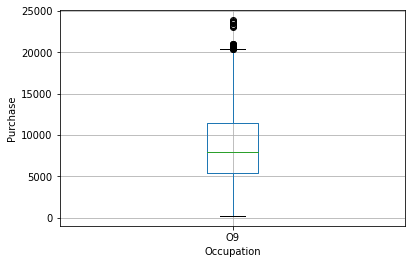

In [ ]:
#Grouping by Occupation
Purchase_by_Occupation = cbf.groupby('Occupation')

#For each group, separated by Occupation, I plotted a box plot using the purchases data points in those groups
for name, group in Purchase_by_Occupation:
  x = group.boxplot(column='Purchase', by='Occupation')
  x.set_title('')
  x.set_ylabel('Purchase')
  plt.suptitle('')




**E. Scatter Matrix Correlation**

<Figure size 1152x432 with 0 Axes>

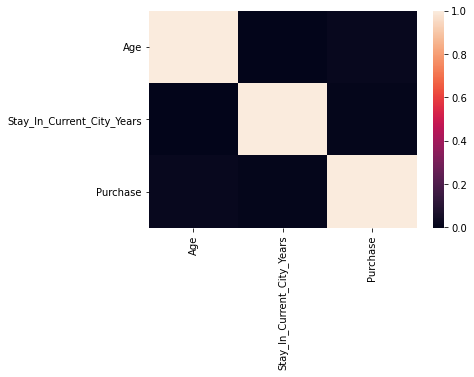

<Figure size 1152x432 with 0 Axes>

In [ ]:
#Creating the heatmap
sns.heatmap(cbf.corr())
#Adjusting the size
plt.figure(figsize=(16,6))

**Analysis**: This shows that none of the numerical predictor variables are correlated to each other. However, another concern is the fact that they are also not correlated to the target variable (purchases), which signals that Age and Stay in City Years may not be good predictors. 

**F. Feature Engineering**

In [ ]:
#After experiencing many crashes, Google docs does not have the memory to process these data columns so I have removed them
cbf = cbf.drop(columns=['User_ID','Product_ID'])

In [ ]:
#Creating function that turns categorical columns into columns of binary values and normalizes numerical columns using mean normalization
def engi(x):
  #Creating all the dummmy variables
  Gender = pd.get_dummies(x['Gender'])
  Occupation = pd.get_dummies(x['Occupation'])
  City = pd.get_dummies(x['City_Category'])
  Marital = pd.get_dummies(x['Marital_Status'])
  PC1 = pd.get_dummies(x['Product_Category_1'])
  #Normalizing numerical values
  Age = ((x['Age'] - x['Age'].mean())/(x['Age'].max() - x['Age'].min()))
  Stay = ((x['Stay_In_Current_City_Years'] - x['Stay_In_Current_City_Years'].mean())/(x['Stay_In_Current_City_Years'].max() - x['Stay_In_Current_City_Years'].min()))
  Purchase = ((x['Purchase'] - x['Purchase'].mean())/(x['Purchase'].max() - x['Purchase'].min()))
  #Concatinating them together into a new data frame
  fcbf = pd.concat([Gender, Age, Occupation, City, Stay, Marital, PC1, Purchase], axis = 1)
  return (fcbf)

In [ ]:
#Executing the feature engineering
fcbf = engi(cbf)

In [ ]:
display(fcbf)

,F,M,Age,0,O1,O10,O11,O12,O13,O14,O15,O16,O17,O18,O19,O2,O20,O3,O4,O5,O6,O7,O8,O9,A,B,C,Stay_In_Current_City_Years,M0,M1,P1,P10,P11,P12,P13,P14,P15,P16,P17,P18,P2,P3,P4,P5,P6,P7,P8,P9,Purchase
0,1,0,-0.557436,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.035093,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-0.040427
1,1,0,-0.557436,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.035093,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.246838
2,1,0,-0.557436,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.035093,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.332654
3,1,0,-0.557436,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.035093,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.348006
4,0,1,0.442564,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.535093,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.057292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497991,0,1,0.138216,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.285093,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.147509
497992,0,1,0.138216,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.285093,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.031594
497993,0,1,0.138216,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.285093,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.020896
497994,0,1,0.138216,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.285093,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.027163


**G. Linear Regression Model**

In [165]:
#Splitting data set into training and testing data sets with 80% used for training
x_train, x_test, y_train, y_test = train_test_split(fcbf.drop(['Purchase'], axis=1), fcbf['Purchase'], test_size = 0.2, random_state=0)

In [170]:
#Creating function that will train  and fit the model, returning the coefficients, intercepts, MAE, MSE, RMSE, and R^2
#The evalate in here is to determine whether an assesment should be done on how the model performed.
def lrm(data_frame, evaluate):

  #Creating linear regression model  
  model = LinearRegression()

  #Training said model
  model.fit(x_train, y_train)

  #Using model to predict the test data set  
  y_pred = model.predict(x_test)

  #Obtaining the coefficients, intercepts, MAE, MSE, and R^2
  evaluate = evaluate.lower()
  if evaluate in ['y', 'yes']:
    print('Coefficients: {}'.format(model.coef_))
    print('Intecerpt: {}'.format(model.intercept_))
    print('Mean absolute Error (MAE): {:.2f}'.format(skl.metrics.mean_absolute_error(y_test, y_pred)))
    print('Mean squared error (MSE): {:.2f}'.format(skl.metrics.mean_squared_error(y_test, y_pred)))
    print('Root mean squared error (RMSE): {:.2f}'.format(np.sqrt(skl.metrics.mean_squared_error(y_test, y_pred))))
    print('Coefficient of Determination (R^2): {:.2f}'.format(skl.metrics.r2_score(y_test, y_pred)))
  else:
    pass
  #Returning the model will help us use the same model when we are predicting with other data after
  return (model)

In [167]:
#Executing previous linear regression function
lrm(fcbf, 'Y')

Coefficients: [-1.10944763e+11 -1.10944763e+11  2.41515724e-02 -8.14982748e+09
 -8.14982748e+09 -8.14982748e+09 -8.14982748e+09 -8.14982748e+09
 -8.14982748e+09 -8.14982748e+09 -8.14982748e+09 -8.14982748e+09
 -8.14982748e+09 -8.14982748e+09 -8.14982748e+09 -8.14982748e+09
 -8.14982748e+09 -8.14982748e+09 -8.14982748e+09 -8.14982748e+09
 -8.14982748e+09 -8.14982748e+09 -8.14982748e+09 -8.14982748e+09
 -4.29533619e+10 -4.29533619e+10 -4.29533619e+10  5.80076151e-04
  3.74068092e+11  3.74068092e+11  1.22554803e+10  1.22554803e+10
  1.22554803e+10  1.22554803e+10  1.22554803e+10  1.22554803e+10
  1.22554803e+10  1.22554803e+10  1.22554803e+10  1.22554803e+10
  1.22554803e+10  1.22554803e+10  1.22554803e+10  1.22554803e+10
  1.22554803e+10  1.22554803e+10  1.22554803e+10  1.22554803e+10]
Intecerpt: -224275619852.54218
Mean absolute Error (MAE): 0.10
Mean squared error (MSE): 0.02
Root mean squared error (RMSE): 0.13
Coefficient of Determination (R^2): 0.63


LinearRegression()

**H. Final Linear Regression Model Test**

In [ ]:
#Loading final data set
fe = pd.read_csv('Black_Friday_Final_Test.csv')

In [ ]:
#Cleaning and Saving the final test data set
clean(fe, "final_cleaned_bf_data.csv")

In [ ]:
#Loading new data set properly
cfe = pd.read_csv(r'final_cleaned_bf_data.csv', dtype=final_format, delimiter=',')

In [ ]:
#Dropping User ID and Product ID from new data set
cfe = cfe.drop(columns=['User_ID','Product_ID'])

In [ ]:
#Executing the feature engineering
fcfe = engi(cfe)

In [169]:
#Creating x variables (Which just does not have the purchase data)
x_final = fcfe.drop(['Purchase'], axis = 1)
#Creating the y variables (The purchase data)
y_final = fcfe['Purchase']

In [171]:
#Creating function that trains and fits the model, returning the coefficients, intercepts, MAE, MSE, RMSE, and R^2
#The m is where the lrm model will placed to ensure we are testing this new data set with the trained model
def flrm(data_frame, m):
  #Usign previously trained model to predict new data  
  fy_pred = m.predict(x_final)

  #Obtaining the coefficients, intercepts, MAE, MSE, and R^2
  print('Coefficients: {}'.format(m.coef_))
  print('Intecerpt: {}'.format(m.intercept_))
  print('Mean absolute Error (MAE): {:.2f}'.format(skl.metrics.mean_absolute_error(y_final, fy_pred)))
  print('Mean squared error (MSE): {:.2f}'.format(skl.metrics.mean_squared_error(y_final, fy_pred)))
  print('Root mean squared error (RMSE): {:.2f}'.format(np.sqrt(skl.metrics.mean_squared_error(y_final, fy_pred))))
  print('Coefficient of Determination (R^2): {:.2f}'.format(skl.metrics.r2_score(y_final, fy_pred)))

In [172]:
#Execting final linear regression model test
flrm(fcfe, lrm(fcbf, 'N'))

Coefficients: [-1.10944763e+11 -1.10944763e+11  2.41515724e-02 -8.14982748e+09
 -8.14982748e+09 -8.14982748e+09 -8.14982748e+09 -8.14982748e+09
 -8.14982748e+09 -8.14982748e+09 -8.14982748e+09 -8.14982748e+09
 -8.14982748e+09 -8.14982748e+09 -8.14982748e+09 -8.14982748e+09
 -8.14982748e+09 -8.14982748e+09 -8.14982748e+09 -8.14982748e+09
 -8.14982748e+09 -8.14982748e+09 -8.14982748e+09 -8.14982748e+09
 -4.29533619e+10 -4.29533619e+10 -4.29533619e+10  5.80076151e-04
  3.74068092e+11  3.74068092e+11  1.22554803e+10  1.22554803e+10
  1.22554803e+10  1.22554803e+10  1.22554803e+10  1.22554803e+10
  1.22554803e+10  1.22554803e+10  1.22554803e+10  1.22554803e+10
  1.22554803e+10  1.22554803e+10  1.22554803e+10  1.22554803e+10
  1.22554803e+10  1.22554803e+10  1.22554803e+10  1.22554803e+10]
Intecerpt: -224275619852.54218
Mean absolute Error (MAE): 0.10
Mean squared error (MSE): 0.02
Root mean squared error (RMSE): 0.13
Coefficient of Determination (R^2): 0.63


**I. Recursive Feature Elimination**

In [173]:
#Importing from sklearn to facilitate the coding
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_regression

#Implementing the decision tree regressor
tree = DecisionTreeRegressor()

#Creating a recursive feature elimination
rfecv = RFECV(estimator=tree, step=1, scoring='neg_mean_absolute_error', verbose=1)

In [176]:
#The recursive feature elimination will be only applied to the training data so there is no information leakage for the actual testing
#Executing the recursive feature elimination
rfecv.fit(x_train, y_train)

Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 fe

RFECV(estimator=DecisionTreeRegressor(), scoring='neg_mean_absolute_error',
      verbose=1)

In [183]:
#Using model to predict the test data set  
y_pred = rfecv.predict(x_test)

#Obtaining the coefficients, intercepts, MAE, MSE, and R^2
print('Mean absolute Error (MAE): {:.2f}'.format(skl.metrics.mean_absolute_error(y_test, y_pred)))
print('Mean squared error (MSE): {:.2f}'.format(skl.metrics.mean_squared_error(y_test, y_pred)))
print('Root mean squared error (RMSE): {:.2f}'.format(np.sqrt(skl.metrics.mean_squared_error(y_test, y_pred))))
print('Coefficient of Determination (R^2): {:.2f}'.format(skl.metrics.r2_score(y_test, y_pred)))

Mean absolute Error (MAE): 0.09
Mean squared error (MSE): 0.02
Root mean squared error (RMSE): 0.13
Coefficient of Determination (R^2): 0.64


In [184]:
#Usign model to predict final test data  
fy_pred = rfecv.predict(x_final)

#Obtaining the coefficients, intercepts, MAE, MSE, and R^2
print('Mean absolute Error (MAE): {:.2f}'.format(skl.metrics.mean_absolute_error(y_final, fy_pred)))
print('Mean squared error (MSE): {:.2f}'.format(skl.metrics.mean_squared_error(y_final, fy_pred)))
print('Root mean squared error (RMSE): {:.2f}'.format(np.sqrt(skl.metrics.mean_squared_error(y_final, fy_pred))))
print('Coefficient of Determination (R^2): {:.2f}'.format(skl.metrics.r2_score(y_final, fy_pred)))

Mean absolute Error (MAE): 0.09
Mean squared error (MSE): 0.02
Root mean squared error (RMSE): 0.13
Coefficient of Determination (R^2): 0.63


**Reslts**: Here we can see that the new model utilizing recursive feature elimination through the use of a MAE scoring system, was able to reduce the overall MAE for the test data and the final test data 0.1 to 0.09, while also increasing the R-squared from 0.63 in the first model  to 0.64 in the new model with the test data. On the other hand, the R squared also decreased to 0.63 from its 0.64 in the final test data using the new model. 